In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = './datascienceforbusiness-master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_df = pd.read_csv(path)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
churn_df.SeniorCitizen.unique()

array([0, 1])

In [5]:
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [6]:
len(churn_df.MonthlyCharges.unique()) 

1585

In [7]:
#Summerise our Data
print("Rows    :" ,churn_df.shape[0])
print("Columns : ", churn_df.shape[1])
print('\nFeatures : \n', churn_df.columns)
print('\nMissing Value :', churn_df.isnull().sum().values.sum())
print('\nUnique value :\n', churn_df.nunique())

Rows    : 7043
Columns :  21

Features : 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Missing Value : 0

Unique value :
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
churn_df['Churn'].value_counts(sort=False)

Yes    1869
No     5174
Name: Churn, dtype: int64

# Exploratory Data Analysis

In [9]:
churn_df_copy = churn_df.copy()

In [10]:
churn_df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges','tenure'], axis=1, inplace=True)
churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [11]:
#create a dataset called summary so that we can sumerize our churn
#Cross tab  -  compute a simple cross tabulation of two ( or more ) factors. By defaults computes a frequency table of the factors unless an array of value

summary  = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [12]:
#Example of cross tab
df = pd.DataFrame({
                    'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['X','Y', 'Z'] * 4,
                    'C' :['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] *2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)
})

df

,A,B,C,D,E
0,one,X,foo,1.025942,-1.236061
1,one,Y,foo,-0.984456,-1.477494
2,two,Z,foo,-0.038462,0.591800
3,three,X,bar,-0.036998,-0.205040
4,one,Y,bar,-0.304555,2.516003
5,one,Z,bar,-0.455095,1.260442
6,two,X,foo,0.581067,0.574697
7,three,Y,foo,-0.491829,-1.549168
8,one,Z,foo,-0.006906,1.095950
9,one,X,bar,0.565707,-1.428039


In [13]:
pd.crosstab(index=df.A  ,columns = df.B)

B,X,Y,Z
A,,,
one,2,2,2
three,1,1,1
two,1,1,1


In [14]:
pd.crosstab(index=df.A  ,columns = df.C)

C,bar,foo
A,,
one,3,3
three,2,1
two,1,2


# Percentage columns

In [15]:
summary['Churn_percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary

Churn                                         No   Yes  Churn_percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

# Visualizations and EDA

In [19]:
labels = churn_df['Churn'].value_counts(sort=True).index
print(labels)

sizes = churn_df['Churn'].value_counts(sort=True)
sizes

Index(['No', 'Yes'], dtype='object')


No     5174
Yes    1869
Name: Churn, dtype: int64

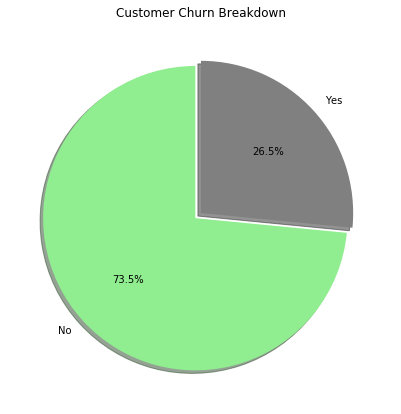

In [30]:
from pylab import rcParams

#Data to plot
labels = churn_df['Churn'].value_counts(sort=True).index


colors = ['lightgreen', 'gray']
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Customer Churn Breakdown')
plt.show()

In [17]:
labels

Index(['No', 'Yes'], dtype='object')

/home/manish/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


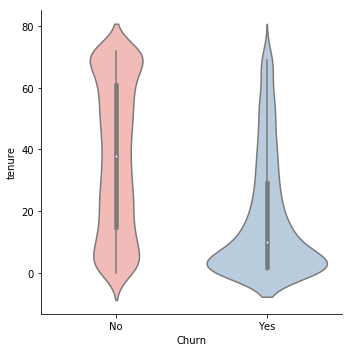

In [34]:
g = sns.factorplot(x="Churn", y='tenure',data= churn_df, kind='violin', palette='Pastel1')

/home/manish/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


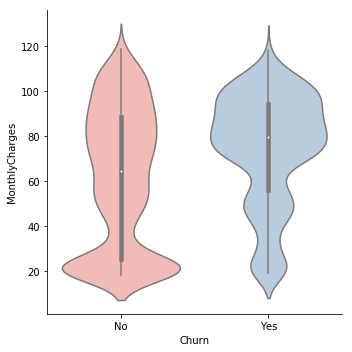

In [35]:
g = sns.factorplot(x="Churn", y='MonthlyCharges',data= churn_df, kind='violin', palette='Pastel1')

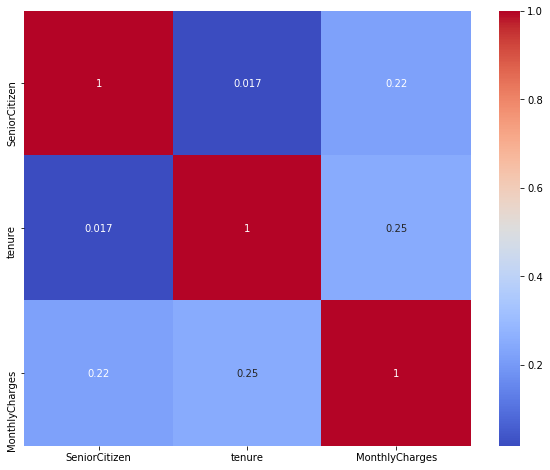

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(churn_df.corr(), annot=True, cmap='coolwarm', ax=ax)

# Check Data for Machine Learning classifier

In [37]:
# check empty fields, Note,   " " is not Null but spaced character
len(churn_df[churn_df['TotalCharges'] == ' '])

11

In [38]:
# Drop missing data
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Id_col = ['CustermerID']

# Target Columns
target_col = ['churn']

#categorical columns
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numericals column
num_cols = [ x for x in churn_df.columns if x not in cat_cols + target_col + Id_col]

#binary columns  with 2 values[
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

#columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]


#Label encoding Binary colunns
le = LabelEncoder()
for i in bin_cols:
    churn_df[i] = le.fit_transform(churn_df[i])

#Duplicating columns for multi value
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols)
churn_df.head()

/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [47]:
# cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
# cat_cols

# num_cols = [ x for x in churn_df.columns if x not in cat_cols + target_col + Id_col]
# num_cols

In [48]:
num_cols

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [49]:
churn_df.shape[1]

42

In [50]:
#Scalling Numerical columns
std = StandardScaler()

#Scale data
scaled = std.fit_transform(churn_df[num_cols[1:]])
scaled = pd.DataFrame(scaled, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

#Dropping  original values merging scaled values for numerical columns
df_telecom_og = churn_df.copy()
churn_df = churn_df.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
churn_df = churn_df.merge(scaled, left_index=True,right_index=True, how='left')

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [51]:
churn_df.drop(['customerID'], axis=1, inplace=True)

In [52]:
churn_df = churn_df.dropna()

In [53]:
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


# Modelling

In [54]:
from sklearn.model_selection import train_test_split

#we remove the label values from our training data
X = churn_df.drop(['Churn'], axis=1).values

#we assigned those label values to our Y dataset
y = churn_df['Churn'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.227279,1.155165,0.640141
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.490341,0.653234,1.572965
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.612573,1.258210,2.323734
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.245878,1.166799,1.700204
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.612573,-0.056449,1.059842


In [57]:
print(len(churn_df.columns))
churn_df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [58]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
score = model.score(X_test, y_test)

print('Accuracy = ' + str(score))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy = 0.7916468913146654
[[1390  171]
 [ 268  278]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1561
           1       0.62      0.51      0.56       546

    accuracy                           0.79      2107
   macro avg       0.73      0.70      0.71      2107
weighted avg       0.78      0.79      0.78      2107



/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.07141373089983777, 0.0175579723058073, 0.23959021090635355, 0.06777058529410614, 0.3029282177975433, 0.29519831106241734, 0.15318910397395466, 0.15441322192036888, 0.14973911382354538, 0.499413711171756, 0.2749284877589803, 0.23285621630510808, 0.16637069522443174, 0.23285621630510808, 0.3908559186372795, 0.09411859945296742, 0.23285621630510808, 0.3186038228657486, 0.0541235334259098, 0.23285621630510808, 0.17036168998690096, 0.08980946712589427, 0.23285621630510808, 0.31429469053870945, 0.1870612082819326, 0.23285621630510808, 0.03742401513086215, 0.17694810177052986, 0.23285621630510808, 0.047537121642273944, 0.9660605262934728, 0.2712313760703313, 1.1521705899410748, 0.3070613599361848, 0.37054562450480794, 0.23973943851341162, 0.019473893790324808, 0.0016785758162326542, 0.006225972236674013, 0.01775382833950931]


In [61]:
#Finding and deleting the label column
cols = list(churn_df.columns)
cols.index('Churn')

6

In [62]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [63]:
#Sorting on Feature Importance
sorted_index = sorted(range(len(coef)),key=lambda k: coef[k], reverse=True)
for idx in sorted_index:
    print(cols[idx])

Contract_Two year
Contract_Month-to-month
InternetService_DSL
OnlineSecurity_Yes
PaymentMethod_Credit card (automatic)
OnlineBackup_Yes
TechSupport_Yes
PaymentMethod_Bank transfer (automatic)
PhoneService
PaperlessBilling
InternetService_Fiber optic
Contract_One year
PaymentMethod_Electronic check
Partner
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
StreamingTV_No
StreamingMovies_No
DeviceProtection_Yes
OnlineSecurity_No
MultipleLines_No phone service
MultipleLines_No
MultipleLines_Yes
OnlineBackup_No
TechSupport_No
gender
Dependents
DeviceProtection_No
StreamingMovies_Yes
StreamingTV_Yes
PaymentMethod_Mailed check
TotalCharges
SeniorCitizen
MonthlyCharges
tenure


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

prediction = model.predict(X_test)
score = model.score(X_test, y_test)

print('Accuracy =', str(score))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy = 0.7916468913146654
[[1390  171]
 [ 268  278]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1561
           1       0.62      0.51      0.56       546

    accuracy                           0.79      2107
   macro avg       0.73      0.70      0.71      2107
weighted avg       0.78      0.79      0.78      2107



/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
import pickle

# Save
with open('model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)
    
#Open
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [66]:
predictions = loaded_model_rf.predict(X_test)

# Deep Learning

In [67]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [68]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer='uniform', activation='relu', input_dim=40))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0121 22:55:42.239115 140649591494464 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0121 22:55:42.324352 140649591494464 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


# Training model

In [70]:
batch_size = 64
epochs = 25

history = model.fit(X_train,
                   y_train,
                   batch_size= batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss',  score[0])
print('Test accuracy :', score[1])

Train on 4914 samples, validate on 2107 samples
Epoch 1/25
4914/4914 [==============================] - 0s 43us/sample - loss: 0.6128 - acc: 0.7287 - val_loss: 0.5208 - val_acc: 0.7409
Epoch 2/25
4914/4914 [==============================] - 0s 21us/sample - loss: 0.4892 - acc: 0.7314 - val_loss: 0.4571 - val_acc: 0.7409
Epoch 3/25
4914/4914 [==============================] - 0s 21us/sample - loss: 0.4619 - acc: 0.7314 - val_loss: 0.4473 - val_acc: 0.7409
Epoch 4/25
4914/4914 [==============================] - 0s 23us/sample - loss: 0.4552 - acc: 0.7314 - val_loss: 0.4418 - val_acc: 0.7409
Epoch 5/25
4914/4914 [==============================] - 0s 21us/sample - loss: 0.4513 - acc: 0.7540 - val_loss: 0.4396 - val_acc: 0.7902
Epoch 6/25
4914/4914 [==============================] - 0s 22us/sample - loss: 0.4489 - acc: 0.7837 - val_loss: 0.4373 - val_acc: 0.7874
Epoch 7/25
4914/4914 [==============================] - 0s 20us/sample - loss: 0.4468 - acc: 0.7855 - val_loss: 0.4331 - val_acc: 

In [71]:
prediction = model.predict(X_test)
prediction = (prediction > 0.5)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1419  142]
 [ 302  244]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1561
           1       0.63      0.45      0.52       546

    accuracy                           0.79      2107
   macro avg       0.73      0.68      0.69      2107
weighted avg       0.77      0.79      0.78      2107



# Saving and loading our Deep learning model

In [72]:
model.save('simple_cnn_25_epochs.hs')
print('Model Saved')

Model Saved


In [73]:
#Load our Mode
from tensorflow.keras.models import load_model

classifier = load_model('simple_cnn_25_epochs.hs')

W0121 22:58:01.452985 140649591494464 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Deeper Model and Learn to use Checkpoints and Early stopping

In [74]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

#Hidden Layer1
model2.add(Dense(2000, activation = 'relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape = None, seed=None))

#Hidden Layer1
model2.add(Dense(1000, activation = 'relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape = None, seed=None))

#Hidden Layer1
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape = None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

checkpoint = ModelCheckpoint('deep_model_checkpoint.h5',
                            monitor='val_loss',
                            mode ='min',
                            save_best_only = True,
                            verbose=1)

W0121 23:04:02.643659 140649591494464 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2000)              82000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [75]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience =2,
                         verbose =1,
                         restore_best_weights = True)

callbacks = [earlystop, checkpoint]

In [78]:
batch_size = 32
epochs = 10

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=epochs,
                    verbose = 1,
                     validation_data = (X_test, y_test)
                    )
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss :', score[0])
print('Test Accuracy :',score[1])

Train on 4914 samples, validate on 2107 samples
Epoch 1/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4772 - acc: 0.7814 - val_loss: 0.4643 - val_acc: 0.7926
Epoch 2/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4792 - acc: 0.7821 - val_loss: 0.4707 - val_acc: 0.7883
Epoch 3/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4815 - acc: 0.7739 - val_loss: 0.4619 - val_acc: 0.7912
Epoch 4/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4763 - acc: 0.7823 - val_loss: 0.4569 - val_acc: 0.7950
Epoch 5/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4805 - acc: 0.7770 - val_loss: 0.4815 - val_acc: 0.7750
Epoch 6/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4779 - acc: 0.7806 - val_loss: 0.4592 - val_acc: 0.7855
Epoch 7/10
4914/4914 [==============================] - 5s 1ms/sample - loss: 0.4782 - acc: 0.7825 - val_loss: 0.4597 - val_acc: 0.7902
